# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
taxi = pd.DataFrame(
    data={
        'Passangers': list(range(1,6)),
        'taxi_meter': [7.5, 10, 12.5, 15, 17.5],
        'Paid (incl. tips)': [8, 10, 14, 15, 20],
    }
)

taxi

,Passangers,taxi_meter,Paid (incl. tips)
0,1,7.5,8
1,2,10.0,10
2,3,12.5,14
3,4,15.0,15
4,5,17.5,20


In [3]:
taxi.set_index('Passangers')[['taxi_meter']]

,taxi_meter
Passangers,
1,7.5
2,10.0
3,12.5
4,15.0
5,17.5


In [4]:
taxi.set_index('Passangers')[['taxi_meter', 'Paid (incl. tips)']]

,taxi_meter,Paid (incl. tips)
Passangers,,
1,7.5,8
2,10.0,10
3,12.5,14
4,15.0,15
5,17.5,20


(-0.1, 20.5)

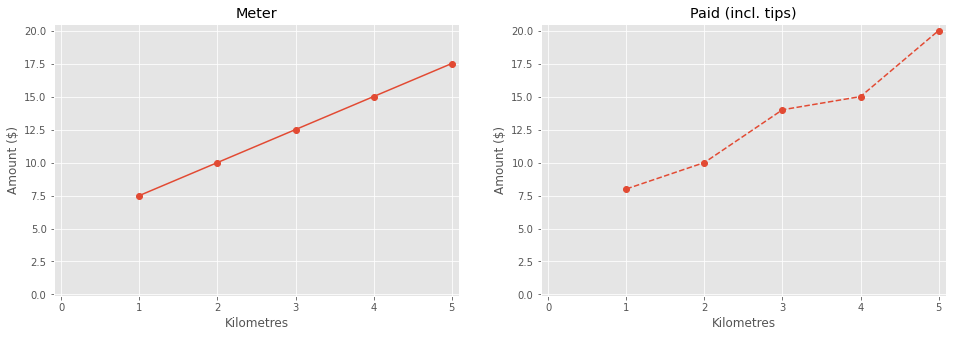

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=False, sharey=False)
taxi.set_index('Passangers')['taxi_meter'].plot(title='Meter', kind='line', marker='o', zorder=1, ax=axs[0])
taxi.set_index('Passangers')['Paid (incl. tips)'].plot(title='Paid (incl. tips)', kind='line', marker='o', linestyle='--', ax=axs[1])


axs[0].set_xlabel('Kilometres')
axs[1].set_xlabel('Kilometres')

axs[0].set_ylabel('Amount ($)')
axs[1].set_ylabel('Amount ($)')

axs[0].set_xlim((-0.1,5.1))
axs[0].set_ylim((-0.1,20.5))

axs[1].set_xlim((-0.1,5.1))
axs[1].set_ylim((-0.1,20.5))

## Running Linear Regression

In [8]:
taxi

,Passangers,taxi_meter,Paid (incl. tips)
0,1,7.5,8
1,2,10.0,10
2,3,12.5,14
3,4,15.0,15
4,5,17.5,20


In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(taxi[['Passangers']], taxi['Paid (incl. tips)'])

taxi['Paid (Predicted)'] = reg.predict(taxi[['Passangers']])

In [10]:
print(
    f'Amount Paid = {reg.intercept_:.1f} + {reg.coef_[0]:.1f} * Distance'
) 

Amount Paid = 4.7 + 2.9 * Distance


## Plotting the Regressed Line
In higher dimensions, the line will be a hyperplane

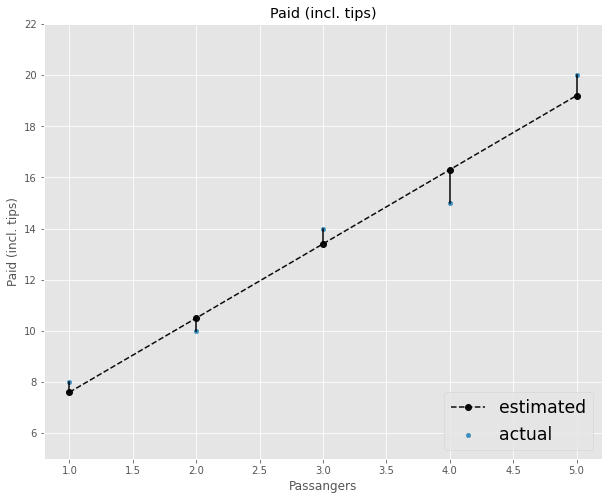

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8), sharex=False, sharey=False)

taxi.tail(5).plot(
    label='actual', kind='scatter', x='Passangers', y='Paid (incl. tips)',
    marker='o', alpha=0.95, ax=ax
)

taxi.tail(5).set_index('Passangers')['Paid (Predicted)'].plot(
    title='Paid (incl. tips)', label='estimated', kind='line', 
    marker='o', linestyle='--', color='k', alpha=0.95, ax=ax
)

x_min, m_max = 0.8, 5.2
y_min, y_max = 5, 22

ax.set_xlim((x_min, m_max))
ax.set_ylim((y_min, y_max))

for x, y1, y2 in taxi.tail(5)[
    ['Passangers', 'Paid (incl. tips)', 'Paid (Predicted)']
].values.tolist():
    ymin, ymax = min(y1, y2), max(y1, y2)
    ymin, ymax = (ymin-y_min)/(y_max-y_min) , (ymax-y_min)/(y_max-y_min)
    ax.axvline(x=x, ymin=ymin, ymax=ymax, color='k')

ax.legend(loc='lower right', fontsize='xx-large')

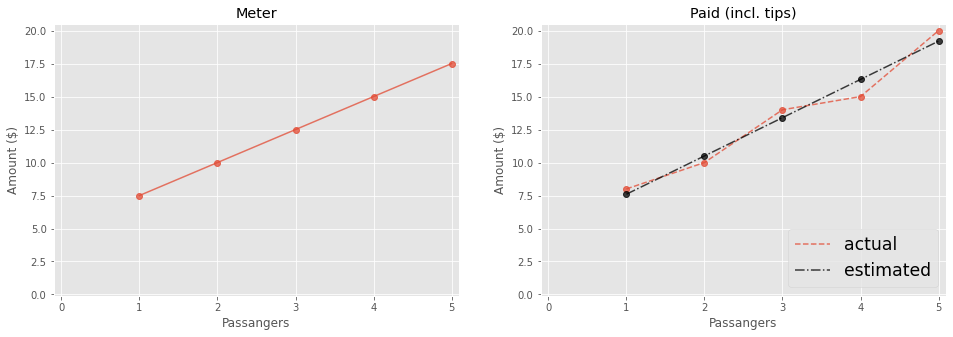

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=False, sharey=False)

taxi.set_index('Passangers')['taxi_meter'].plot(
    title='Meter', kind='line', 
    marker='o', alpha=0.75, ax=axs[0]
)
taxi.set_index('Passangers')['Paid (incl. tips)'].plot(
    label='actual', kind='line', 
    marker='o', linestyle='--', alpha=0.75, ax=axs[1]
)

taxi.set_index('Passangers')['Paid (Predicted)'].plot(
    title='Paid (incl. tips)', label='estimated', kind='line', 
    marker='o', linestyle='-.', color='k', alpha=0.75, ax=axs[1]
)

axs[0].set_xlabel('Passangers')
axs[1].set_xlabel('Passangers')

axs[0].set_ylabel('Amount ($)')
axs[1].set_ylabel('Amount ($)')

axs[0].set_xlim((-0.1,5.1))
axs[0].set_ylim((-0.1,20.5))

axs[1].set_xlim((-0.1,5.1))
axs[1].set_ylim((-0.1,20.5))

axs[1].legend(
    markerscale=0.01, loc='lower right', fontsize='xx-large'
)


# Predicting house prices in Boston

In [15]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()

df_dataset = pd.DataFrame(
 boston.data,
 columns=boston.feature_names,
)

df_dataset['target'] = boston.target

In [16]:
df_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
df_dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

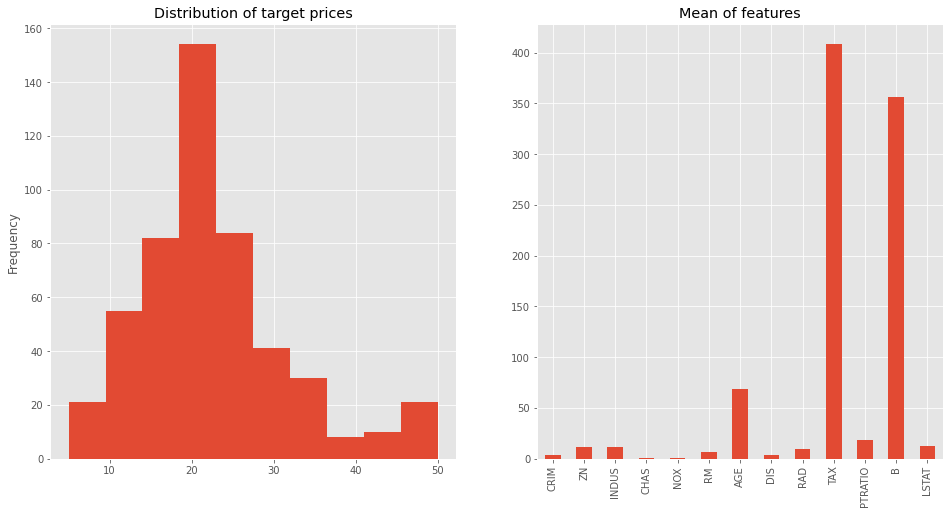

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

df_dataset['target'].plot(
 title='Distribution of target prices', kind='hist', ax=axs[0]
)
df_dataset[boston.feature_names].mean().plot(
 title='Mean of features', kind='bar', ax=axs[1]
)

In [19]:
df_dataset['target'].describe(percentiles=[.9, .95, .99])

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
50%       21.200000
90%       34.800000
95%       43.400000
99%       50.000000
max       50.000000
Name: target, dtype: float64

In [20]:
df_dataset[boston.feature_names].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
df_dataset['target'].head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

## Splitting the data

In [22]:
data = df_dataset[boston.feature_names]
target = df_dataset['target']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=.4
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((303, 13), (303,), (203, 13), (203,))

In [25]:
print(y_train.mean())
print(y_test.mean())
print(target.mean())

22.729042904290413
22.23990147783251
22.532806324110698


In [26]:
print(y_train.median())
print(y_test.median())
print(target.median())

21.4
21.1
21.2


## Baseline Regressor

In [27]:
from sklearn.dummy import DummyRegressor

bs = DummyRegressor(strategy='mean')
bs.fit(X_train, y_train)

y_pred_bs = bs.predict(X_test)

In [28]:
y_pred_bs[:5]

array([22.7290429, 22.7290429, 22.7290429, 22.7290429, 22.7290429])

## Linear Regressor

In [29]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [30]:
y_pred[:5]

array([17.34991727, 20.1703622 , 24.16461257, 25.28944945, 24.93363271])

## Comparing our Linear Regression to the baseline model

In [31]:
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
)

print(
    'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        r2_score(y_test, y_pred), 
        r2_score(y_test, y_pred_bs)
    )
)
print(
    'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_absolute_error(y_test, y_pred), 
        mean_absolute_error(y_test, y_pred_bs)
    )
)

print(
    'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
        mean_squared_error(y_test, y_pred), 
        mean_squared_error(y_test, y_pred_bs)
    )
)

R2 Regressor = 0.67 vs Baseline = -0.00
MAE Regressor = 3.33 vs Baseline = 5.58
MSE Regressor = 21.34 vs Baseline = 64.73


## Showing feature coefficients

In [32]:
df_feature_importance = pd.DataFrame(
    {
        'Features': X_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_),
    }
).set_index('Features').sort_values('Coeff', ascending=False)

df_feature_importance

,Coeff,ABS(Coeff)
Features,,
RM,4.280120,4.280120
CHAS,1.261789,1.261789
RAD,0.274523,0.274523
ZN,0.030694,0.030694
INDUS,0.023590,0.023590
AGE,0.014362,0.014362
B,0.012927,0.012927
TAX,-0.008605,0.008605
CRIM,-0.124724,0.124724


## Scaling for more meaningful coefficients

In [33]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
486,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
59,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
197,0.04666,80.0,1.52,0.0,0.404,7.107,36.6,7.3090,2.0,329.0,12.6,354.31,8.61
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = LinearRegression()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
486,0.063874,0.00,0.646628,0.0,0.407407,0.425679,0.784648,0.251627,1.000000,0.913958,0.883721,0.989359,0.365618
98,0.000818,0.00,0.089076,0.0,0.123457,0.793193,0.327292,0.246331,0.043478,0.168260,0.627907,0.991502,0.050773
59,0.001059,0.25,0.171188,0.0,0.139918,0.385394,0.437100,0.605329,0.304348,0.183556,0.825581,1.000000,0.206678
197,0.000423,0.80,0.038856,0.0,0.039095,0.639595,0.324094,0.644710,0.043478,0.269598,0.000000,0.892607,0.189845
255,0.000297,0.80,0.116569,0.0,0.014403,0.374408,0.137527,0.844359,0.000000,0.242830,0.441860,0.995663,0.207506


In [35]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

score = r2_score(y_test, y_pred)
score

0.6690318028543314

In [36]:
mean_absolute_error(y_test, y_pred)

3.332590557448334

In [37]:
mean_squared_error(y_test, y_pred)

21.343383836283415

In [38]:
df_feature_importance = pd.DataFrame(
    {
        'Features': X_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_),
    }
).set_index('Features').sort_values('Coeff', ascending=False)

df_feature_importance

,Coeff,ABS(Coeff)
Features,,
RM,19.868318,19.868318
RAD,6.314029,6.314029
B,5.126399,5.126399
ZN,3.069370,3.069370
AGE,1.347109,1.347109
CHAS,1.261789,1.261789
INDUS,0.643527,0.643527
TAX,-4.500313,4.500313
PTRATIO,-9.705026,9.705026


## Adding polynomial features

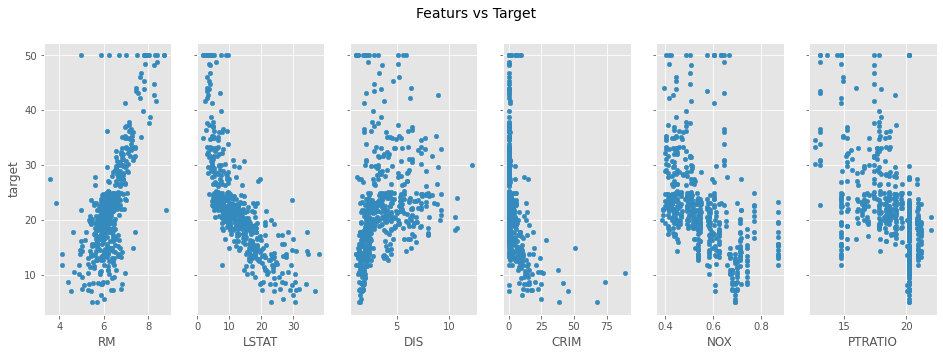

In [40]:
important_featurs = df_feature_importance.sort_values('ABS(Coeff)', ascending=False).index.tolist()[:6]

fig, axs = plt.subplots(1, len(important_featurs), figsize=(16, 5), sharey=True)

fig.suptitle("Featurs vs Target", fontsize=14)

for i, feature in enumerate(important_featurs):

    df_dataset.plot(
        kind='scatter',
        x=feature,
        y='target',
        ax=axs[i]
    )

fig.show()

In [41]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [43]:
feature_translator = [(f'x{i}', feature) for i, feature in enumerate(X_train.columns, 0)]
feature_translator

[('x0', 'CRIM'),
 ('x1', 'ZN'),
 ('x2', 'INDUS'),
 ('x3', 'CHAS'),
 ('x4', 'NOX'),
 ('x5', 'RM'),
 ('x6', 'AGE'),
 ('x7', 'DIS'),
 ('x8', 'RAD'),
 ('x9', 'TAX'),
 ('x10', 'PTRATIO'),
 ('x11', 'B'),
 ('x12', 'LSTAT')]

In [44]:
X_train_poly

array([[1.00000000e+00, 6.38740326e-02, 0.00000000e+00, ...,
        3.57878431e-01, 1.32254146e-01, 4.88745833e-02],
       [1.00000000e+00, 8.18392049e-04, 0.00000000e+00, ...,
        4.99133967e-02, 2.55595388e-03, 1.30884706e-04],
       [1.00000000e+00, 1.05904270e-03, 2.50000000e-01, ...,
        2.06677704e-01, 4.27156734e-02, 8.82837731e-03],
       ...,
       [1.00000000e+00, 1.82247063e-03, 0.00000000e+00, ...,
        4.64270018e-01, 2.17564720e-01, 1.01954478e-01],
       [1.00000000e+00, 1.43985746e-04, 6.00000000e-01, ...,
        8.94457552e-02, 8.21804460e-03, 7.55052679e-04],
       [1.00000000e+00, 5.01983092e-04, 0.00000000e+00, ...,
        1.53007364e-01, 2.41434056e-02, 3.80964692e-03]])

In [46]:
def translate_feature_names(s):
  for key, val in feature_translator:
    s = s.replace(key, val)
  return s

In [47]:
poly_features = [
    translate_feature_names(f) for f in poly.get_feature_names()
]

poly_features[:5]

['1', 'CRIM', 'ZN', 'INDUS', 'CHAS']